<a href="https://colab.research.google.com/github/ricardo2812/TCC---Ci-ncia-da-computa-o---Analise-de-Sentimentos/blob/main/Projeto_de_investimentos_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importandos as bibliotecas




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import scipy.stats as scs

!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Codificação do projeto

In [ ]:
#Baixando os dados do Yahoo
dados = ['PETR4.SA', 'VALE3.SA','BBAS3.SA', '^BVSP', 'EMBR3.SA']
df = web.get_data_yahoo(dados, start = '2021-12-01')
df

[*********************100%***********************]  5 of 5 completed


Adj Close                                                \
             BBAS3.SA   EMBR3.SA   PETR4.SA   VALE3.SA        ^BVSP   
Date                                                                  
2021-12-01  30.088789  18.299999  21.613476  67.629929  100775.0000   
2021-12-02  30.915508  19.360001  23.262602  70.769234  104466.0000   
2021-12-03  30.953962  19.150000  23.590704  69.209213  105070.0000   
2021-12-06  31.790297  20.230000  23.697338  72.964821  106859.0000   
2021-12-07  31.338484  20.299999  24.082861  73.504097  107558.0000   
...               ...        ...        ...        ...          ...   
2022-05-19  35.556175  12.920000  30.662865  79.849998  107005.0000   
2022-05-20  36.850937  12.680000  31.255127  81.260002  108488.0000   
2022-05-23  38.404652  12.830000  32.484512  82.919998  110346.0000   
2022-05-24  37.799999  12.110000  31.600000  84.040001  110581.0000   
2022-05-25  37.570000  12.130000  32.049999  84.300003  110579.8125   

                Close                                                ...  \
             BBAS3.SA   EMBR3.SA   PETR4.SA   VALE3.SA        ^BVSP  ...   
Date                                                                 ...   
2021-12-01  31.299999  18.299999  29.600000  70.230003  100775.0000  ...   
2021-12-02  32.160000  19.360001  28.360001  73.489998  104466.0000  ...   
2021-12-03  32.200001  19.150000  28.760000  71.870003  105070.0000  ...   
2021-12-06  33.070000  20.230000  28.889999  75.769997  106859.0000  ...   
2021-12-07  32.599998  20.299999  29.360001  76.330002  107558.0000  ...   
...               ...        ...        ...        ...          ...  ...   
2022-05-19  35.700001  12.920000  34.169998  79.849998  107005.0000  ...   
2022-05-20  37.000000  12.680000  34.830002  81.260002  108488.0000  ...   
2022-05-23  38.560001  12.830000  36.200001  82.919998  110346.0000  ...   
2022-05-24  37.799999  12.110000  31.600000  84.040001  110581.0000  ...   
2022-05-25  37.570000  12.130000  32.049999  84.300003  110579.8125  ...   

                 Open                                                  \
             BBAS3.SA   EMBR3.SA   PETR4.SA   VALE3.SA          ^BVSP   
Date                                                                    
2021-12-01  32.500000  19.799999  29.840000  71.300003  101916.000000   
2021-12-02  31.690001  18.510000  26.990000  70.970001  100785.000000   
2021-12-03  32.209999  19.420000  28.480000  73.089996  104467.000000   
2021-12-06  32.730000  19.500000  28.780001  72.870003  105070.000000   
2021-12-07  33.599998  20.719999  29.280001  78.279999  106868.000000   
...               ...        ...        ...        ...            ...   
2022-05-19  35.900002  13.090000  33.520000  77.779999  106249.000000   
2022-05-20  36.270000  13.130000  34.590000  82.010002  108520.000000   
2022-05-23  37.310001  12.800000  35.180000  82.300003  108500.000000   
2022-05-24  37.599998  12.630000  31.200001  81.820000  110340.000000   
2022-05-25  37.529999  12.050000  31.700001  84.000000  110579.867188   

              Volume                                           
            BBAS3.SA  EMBR3.SA   PETR4.SA  VALE3.SA     ^BVSP  
Date                                                           
2021-12-01  25896100  11894300  135078600  28194700  13762900  
2021-12-02  17649100   9482700  191410300  24888400  14846500  
2021-12-03  17320300   9670500  105133000  34451500  14581500  
2021-12-06  21267900   7832100   66142300  28848800  11127500  
2021-12-07  12693100   6796500   98989300  37125100  11773100  
...              ...       ...        ...       ...       ...  
2022-05-19   9433100   7404900   63983100  29984300  11426400  
2022-05-20  25792500   9321700   79589900  38372000  12866400  
2022-05-23  25403000   9083600   93807400  27632800  10682700  
2022-05-24  23920500  14660200  154453100  35176800  11724400  
2022-05-25  17302900   9769000   69817000  24564500         0  

[120 rows x 30 columns]

In [ ]:
#trocando os titulos das colunas
titulo = precos.columns=['BB','EMBRAER','PETRO','VALE','IBOV' ]
precos.columns=['BB','EMBRAER','PETRO','VALE','IBOV' ]
precos


,BB,EMBRAER,PETRO,VALE,IBOV
Date,,,,,
2021-12-01,32.500000,19.799999,29.840000,71.300003,101916.000000
2021-12-02,31.690001,18.510000,26.990000,70.970001,100785.000000
2021-12-03,32.209999,19.420000,28.480000,73.089996,104467.000000
2021-12-06,32.730000,19.500000,28.780001,72.870003,105070.000000
2021-12-07,33.599998,20.719999,29.280001,78.279999,106868.000000
...,...,...,...,...,...
2022-05-19,35.900002,13.090000,33.520000,77.779999,106249.000000
2022-05-20,36.270000,13.130000,34.590000,82.010002,108520.000000
2022-05-23,37.310001,12.800000,35.180000,82.300003,108500.000000


In [ ]:
## Exportar os dados para o Excel
precos.to_excel('precos.xlsx', encoding='utf-8', index=True)

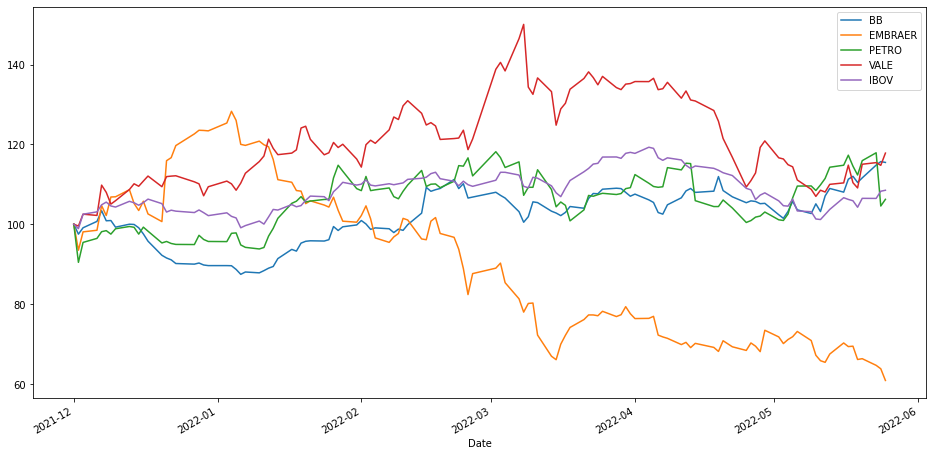

In [ ]:
## Plotar gráficos de preços na base 100
(precos/precos.iloc[0]*100).plot(figsize= (16,8))

In [ ]:
## Estimando os retornos diários
retornos=precos.pct_change()
retornos=retornos.dropna()
retornos

,BB,EMBRAER,PETRO,VALE,IBOV
Date,,,,,
2021-12-02,-0.024923,-0.065151,-0.095509,-0.004628,-0.011097
2021-12-03,0.016409,0.049163,0.055206,0.029872,0.036533
2021-12-06,0.016144,0.004119,0.010534,-0.003010,0.005772
2021-12-07,0.026581,0.062564,0.017373,0.074242,0.017112
2021-12-08,-0.024405,-0.023649,0.002732,-0.016479,0.006457
...,...,...,...,...,...
2022-05-19,-0.013736,-0.048000,-0.019310,-0.011816,-0.015329
2022-05-20,0.010306,0.003056,0.031921,0.054384,0.021374
2022-05-23,0.028674,-0.025133,0.017057,0.003536,-0.000184


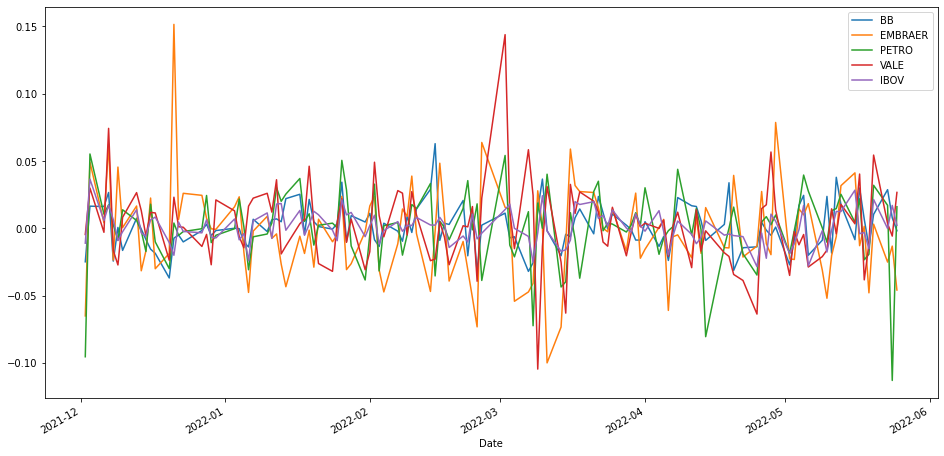

In [ ]:
##Plotando o gráfico dos retornos
retornos.plot(figsize=(16,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1321f2d90>,
      dtype=object)

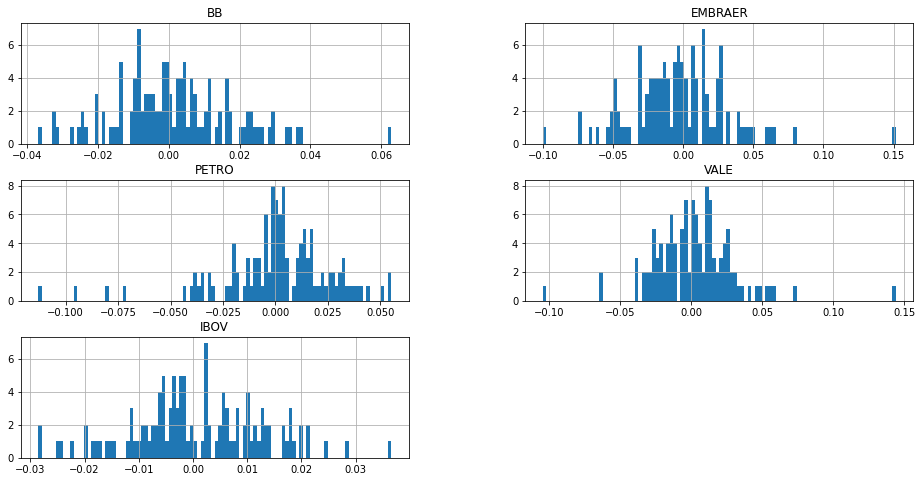

In [ ]:
##plotando Histogramas

retornos.hist(bins=100, figsize=(16,8))

## Estatísticas Descritivas

In [ ]:
retornos.max()

BB         0.062874
EMBRAER    0.151530
PETRO      0.055206
VALE       0.143897
IBOV       0.036533
dtype: float64

In [ ]:
retornos.min()

BB        -0.036954
EMBRAER   -0.100063
PETRO     -0.113132
VALE      -0.104683
IBOV      -0.028563
dtype: float64

In [ ]:
##Estimando a assimetria dos dados
desvios= retornos-retornos.mean()
sig=retornos.std(ddof=0)
S=((desvios**3) / (sig**3)).mean()
S



BB         0.431634
EMBRAER    0.652574
PETRO     -1.261027
VALE       0.644537
IBOV       0.033706
dtype: float64

In [ ]:
scs.skew(retornos)     ## fazendo exatamente a mesma coisa que o código acima, porém com o comando 'skew', porém se torna um array

array([ 0.43163386,  0.65257373, -1.26102654,  0.6445368 ,  0.03370628])

In [ ]:
scs.describe(retornos)

DescribeResult(nobs=119, minmax=(array([-0.03695378, -0.10006294, -0.11313245, -0.10468265, -0.02856318]), array([0.0628742 , 0.15153038, 0.05520562, 0.14389742, 0.03653321])), mean=array([ 0.00134696, -0.00360169,  0.00087121,  0.00178872,  0.00075769]), variance=array([0.00027785, 0.0011446 , 0.00071506, 0.00083682, 0.000145  ]), skewness=array([ 0.43163386,  0.65257373, -1.26102654,  0.6445368 ,  0.03370628]), kurtosis=array([0.81802001, 3.09496854, 3.58268191, 5.16558958, 0.10768968]))

In [ ]:
estat = scs.describe(retornos)
colunas = ['BB','EMBRAER','PETRO','VALE','IBOV' ]
linhas = ['Minimo', 'Máximo', 'Média', 'Variância','Desvio-Padrão','Assimetria','Curtose']
min = estat[1][0]
max = estat[1][1]
media = estat[2]
variancia = estat[3]
desvio_padrao = variancia**(1/2)
assimetria = estat[4]
curtose = estat[5]
estat_desc = [min, max, media, variancia, desvio_padrao, assimetria, curtose]
estat_desc

df=pd.DataFrame(data= estat_desc, index = linhas, columns = colunas)
df

,BB,EMBRAER,PETRO,VALE,IBOV
Minimo,-0.036954,-0.100063,-0.113132,-0.104683,-0.028563
Máximo,0.062874,0.151530,0.055206,0.143897,0.036533
Média,0.001347,-0.003602,0.000871,0.001789,0.000758
Variância,0.000278,0.001145,0.000715,0.000837,0.000145
Desvio-Padrão,0.016669,0.033832,0.026741,0.028928,0.012042
Assimetria,0.431634,0.652574,-1.261027,0.644537,0.033706
Curtose,0.818020,3.094969,3.582682,5.165590,0.107690


In [ ]:
## Estimar os retornos esperados
t = titulo
r_e = retornos.mean()
var = retornos.var()
vol = var**0.5

## Estimando a matriz de covariância
matriz_covar= retornos.cov()
matriz_covar

,BB,EMBRAER,PETRO,VALE,IBOV
BB,0.000278,0.000095,0.000125,0.000050,0.000082
EMBRAER,0.000095,0.001145,0.000163,0.000201,0.000115
PETRO,0.000125,0.000163,0.000715,0.000225,0.000100
VALE,0.000050,0.000201,0.000225,0.000837,0.000128
IBOV,0.000082,0.000115,0.000100,0.000128,0.000145


##Retornos esperados

In [ ]:
r_e_BB = r_e['BB']
r_e_BB

0.0013469575573587388

In [ ]:
r_e_EMB = r_e['EMBRAER']
r_e_EMB

-0.0036016896503821873

In [ ]:
r_e_PET = r_e['PETRO']
r_e_PET

0.0008712121433070071

In [ ]:
r_e_VAL = r_e['VALE']
r_e_VAL

0.001788719502394252

In [ ]:
r_e_IB = r_e['IBOV']
r_e_IB

0.0007576885523502469

In [ ]:
##Volatilidade e Covariância
vol_BB = vol['BB']
vol_EMB = vol['EMBRAER']
vol_PET = vol['PETRO']
vol_VALE = vol['VALE']
vol_IBOV = vol['IBOV']

cov_invests = retornos['BB'].cov(retornos['EMBRAER'])
cov_invests


#Peso de cada ativo

wa = 0.7
wb = 1 - wa

#Retorno e risco desta carteira de investimentos

ret_port = wa * r_e_BB + wb * r_e_EMB
vol_port = (wa ** 2 * vol_BB + wb ** 2 * vol_EMB**2+2*wa*wb*cov_invests) ** 0.5

dados = pd.DataFrame(data=[wa,wb,ret_port, vol_port], index = ['BB (%)','EMBRAER (%)','Retorno','Risco'], columns =['Carteira de investimentos'])
dados





,Carteira de investimentos
BB (%),0.700000
EMBRAER (%),0.300000
Retorno,-0.000138
Risco,0.091163
